In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/advertising-sales-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv


# Importing The Libraries 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read The Dataset**

In [3]:
file_path = r"/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv"
df = pd.read_csv(file_path)

# Data Pre_Processing

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.rename(columns={'Unnamed: 0':'Id','TV Ad Budget ($)':'TV','Radio Ad Budget ($)':'Radio','Newspaper Ad Budget ($)':'Newspaper','Sales ($)':'Sales'} , inplace = True)

In [7]:
df.drop(columns=['Id'] , inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Checking For Missing Values**

In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

the dataset doesn't have missing values

**Checking For Duplicate Values**

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

There is no duplicate rows in the dataset

**Checking For Outliers**

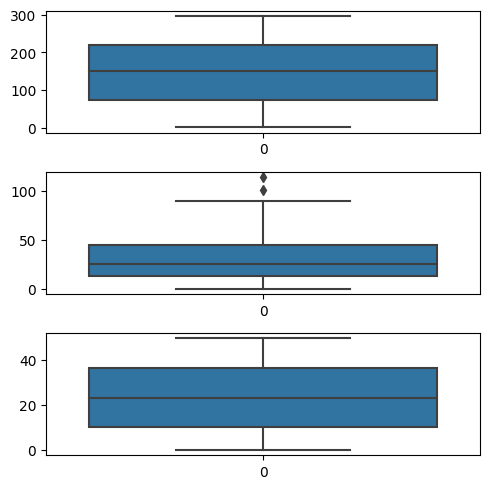

In [11]:
fig , axs = plt.subplots(3 , figsize = (5,5))
plt1 = sns.boxplot(df['TV'] , ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'] , ax = axs[1])
plt3 = sns.boxplot(df['Radio'] , ax = axs[2])
plt.tight_layout()

There are not extreme values in dataset

# Exploratory Data Analysis (EDA) 

**Distribution of the target**

/tmp/ipykernel_18/3969413547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'] ,color='m')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Density'>

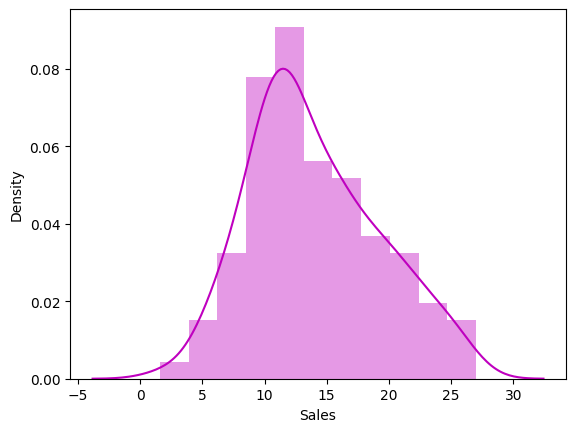

In [12]:
sns.distplot(df['Sales'] ,color='m')

It Is Normally Distributed

**How Seles are related with other variable**

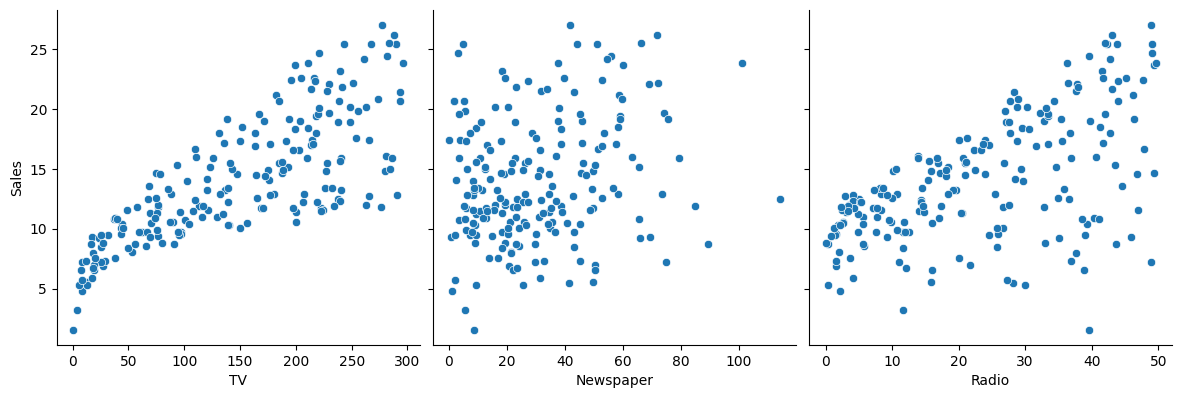

In [13]:
sns.pairplot(df , x_vars = ['TV','Newspaper','Radio'] , y_vars = 'Sales' , height=4 , aspect=1 , kind = 'scatter' )

Note -> TV is strongly linealy correlated with the target variable 
but the Newspaper and Radio seems to be uncorrected 

**Heatmap🔥**

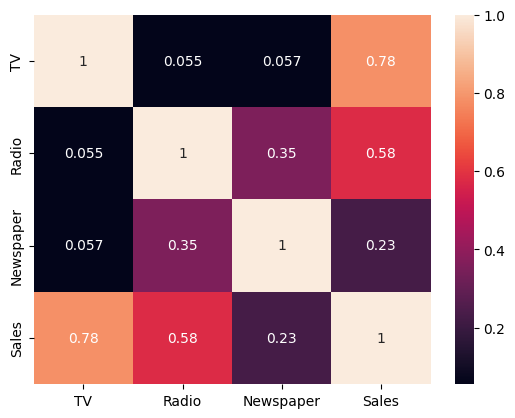

In [14]:
sns.heatmap(df.corr() , annot = True)
plt.show()

TV seems to be most correlated with Salas as 0.78 close to one

# Model Building 🏢 

**Linear Regression is useful tool for predicting a quantitive response**
>   predictions using
*     1-Simple Linear Regression
*     2-Multiple Linear Regression

1. Simple Linear Regression

Simple Linear Regression is a method used to predict the value of one variable (the dependent or target variable) based on the value of another variable (the independent or predictor variable). It establishes this relationship using a straight line.

**Key Points:**
* Single Predictor: Only one independent variable (X) and one dependent variable (Y) are involved.
* Straight Line Relationship: The model tries to find the best-fitting line that represents the relationship between X and Y.
* Goal: The line is determined by calculating the slope (β1) and intercept (β0) that minimize the prediction errors (e).
**Formula:**
> Y=β0+β1X+e
**Where:**
* Y: Dependent variable (what you want to predict)
* X: Independent variable (what you use to make the prediction)
* β0: Intercept (the value of Y when X is 0)   
* β1: Slope (indicates the direction and steepness of the line)
* e: Error term (the difference between actual and predicted values)
**Example Equation:**
> *Sales=β0+β1×TV*

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
#set values in x , y
x = df[['TV']]
y = df['Sales']


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [18]:
# fit the model 
# take an instance from object
slr = LinearRegression()
slr.fit(x_train , y_train)

LinearRegression()

In [19]:
# print the coefficient and intercept of the model
print("Intercept: " , slr.intercept_)
print("Coefficient: " , slr.coef_)

Intercept:  6.98966585741168
Coefficient:  [0.04649736]


In [20]:
print('Regression Equation: Sales = 6.989 + 0.046 * TV')

Regression Equation: Sales = 6.989 + 0.046 * TV


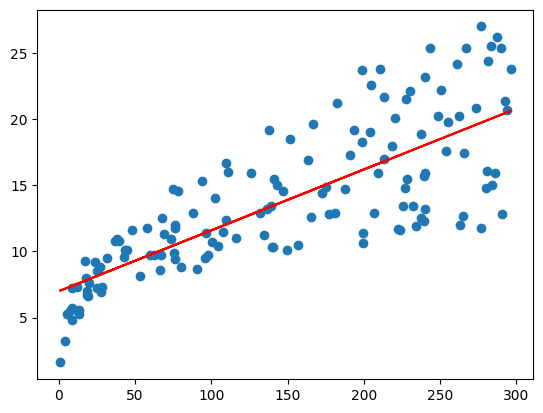

In [21]:
# line the best fit
plt.scatter(x_train , y_train)
plt.plot(x_train , 6.989+0.046*x_train , 'r')
plt.show()

In [22]:
#Prediction of Test and Training set result 
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train) 

In [23]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [24]:
#Actual value 🆚  the predicted value
slr_diff = pd.DataFrame({'Actual Value':y_test , 'Predicted Value':y_pred_slr})
slr_diff.head(10)

,Actual Value,Predicted Value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293


In [25]:
#Predict for any value
slr.predict([[56]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.59351795])

**R-squared value for the model**

In [26]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 61.02


1. Mean Absolute Error (MAE)
2. Mean Square Error (MSE)
3. Root Mean Square Error (RMSE)

In [27]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2.161984932672072
Mean Square Error: 7.975798532854851
Root Mean Square Error: 2.8241456288327007


**2-Multiple Linear Regression** 
* models the relationship between one dependent variable and multiple independent variables.

**Key Points:**
 *Assumptions:*
  * Linear relationship between target and predictors.
  * Normally distributed residuals.
  * Little to no multicollinearity.
  
**Formula:**

> 𝑌=𝛽0+𝛽1𝑋1+⋯+𝛽𝑛𝑋𝑛+𝑒

 * Y: Dependent variable
 * β0: Intercept
 * β1, ..., βn: Coefficients for independent variables
 * X1, ..., Xn: Independent variables
 * e: Error term
**Example:**
> Sales=𝛽0+(𝛽1×TV)+(𝛽2×Radio)+(𝛽3×Newspaper)

This model helps understand how multiple factors influence an outcome.

In [28]:
#Setting the value for X and Y
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [30]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [31]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

2.652789668879498


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893614),
 ('Newspaper', 0.004603078953112072)]

In [32]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [33]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [34]:
#Actual value 🆚  the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741
167,12.2,13.122843
116,12.2,11.807407
96,11.7,12.320198
52,22.6,20.578068
69,22.3,20.956627


In [35]:
#Predict for any value
mlr.predict([[56, 55, 67]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.94170436])

**R-squared value for the model**

In [36]:
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 89.59


1. Mean Absolute Error (MAE)
2. Mean Square Error (MSE)
3. Root Mean Square Error (RMSE)

In [37]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.0638483124072025
Mean Square Error: 1.8506819941636963
Root Mean Square Error: 1.3603977338130553


In [38]:
# Save the trained model to a .pkl file
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(mlr, file)

In [39]:
# Load the model from the .pkl file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)
